# Try out Python mixture model
Test out nipy's pure Python mixture model on component data.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
from nilearn import plotting, image, masking

from aroma.mixture import GGM

In /Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
img = nib.load("melodic_IC.nii.gz")
img.shape

(50, 59, 50, 44)

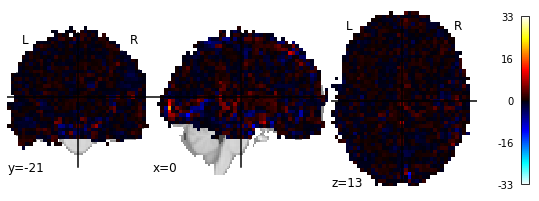

In [3]:
first_img = image.index_img(img, 10)
plotting.plot_stat_map(first_img)

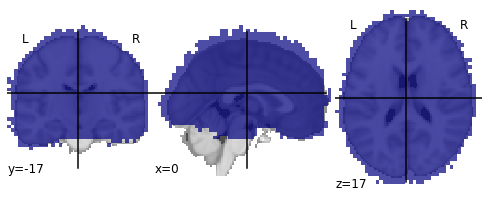

In [4]:
mask = image.math_img("img != 0", img=first_img)
plotting.plot_roi(mask)

In [5]:
THRESH = 0.5
data = masking.apply_mask(img, mask)
thresh_data = np.zeros(data.shape)
for i_comp in range(data.shape[0]):
    arr = data[i_comp, :]
    ggm = GGM()
    ll = ggm.estimate(arr, niter=100000)
    gauss_probs, gamma_probs = ggm.posterior(arr)
    # apply threshold
    arr[gamma_probs < THRESH] = 0
    thresh_data[i_comp, :] = arr
thresh_img = masking.unmask(thresh_data, mask)

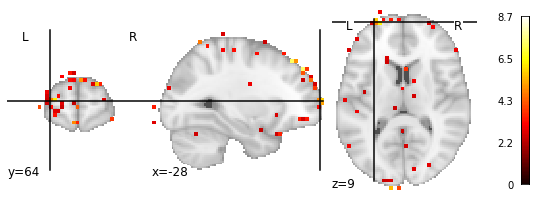

In [6]:
plotting.plot_stat_map(image.index_img(thresh_img, 20))

In [7]:
ggm.parameters()

Gaussian: mean:  -0.18678737127372827 variance:  1.187993101539496
Gamma: shape:  1.6177482604980469 scale:  0.7928585972599853
Mixture gamma:  0.15051726922114103 Gaussian:  0.8494827307788589


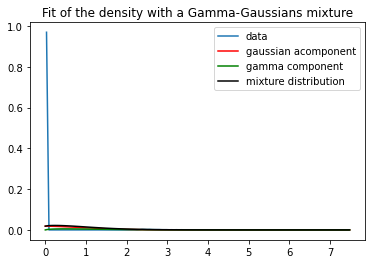

In [8]:
ggm.show(arr)